# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dwi Tatang Warianta]
- **Email:** [tatangwarianta@students.unnes.ac.id]
- **ID Dicoding:** [dwi_tatang_warianta]

## Menentukan Pertanyaan Bisnis

- Bagaimana Pola Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur?
- Bagaimana Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda?
- Bagaimana Pola Penyewaan Sepeda Untuk Jenis Pengguna dan Waktu Tertentu?

## Import Semua Packages/Library yang Digunakan

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [234]:
daily_bike_sharing = pd.read_csv("day.csv")
daily_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [235]:
hourly_bike_sharing = pd.read_csv("hour.csv")
hourly_bike_sharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset mencakup jumlah penyewaan sepeda tiap hari dan jam dari 2011 - 2012
- Dataset terdapat informasi hari dan tanggal dilakukan penyewaan sepeda
- Dataset terdapat informasi mengenai cuaca dan musim saat hari penyewaan

### Assessing Data

In [236]:
# Cek Informasi Dataset
daily_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [237]:
# Cek Informasi Dataset
hourly_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [238]:
# Cek Nilai Kosong
daily_bike_sharing.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [239]:
# Cek Nilai Kosong
hourly_bike_sharing.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [240]:
# Cek Data Duplikat
daily_bike_sharing.duplicated().sum()

0

In [241]:
# Cek Data Duplikat
hourly_bike_sharing.duplicated().sum()

0

In [242]:
# Cek Statistik Deskriptif Dataset
daily_bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [243]:
# Cek Statistik Deskriptif Dataset
hourly_bike_sharing.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [244]:
# Cek Dimensi Dataset
daily_bike_sharing.shape

(731, 16)

In [245]:
# Cek Dimensi Dataset
hourly_bike_sharing.shape

(17379, 17)

In [246]:
# Cek Sampel Dataset
daily_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [247]:
# Cek Sampel Dataset
hourly_bike_sharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [248]:
# Cek Nilai Unique Kolom "season"
daily_bike_sharing["season"].unique()

array([1, 2, 3, 4])

In [249]:
# Cek Nilai Unique Kolom "yr"
daily_bike_sharing["yr"].unique()

array([0, 1])

In [250]:
# Cek Nilai Unique Kolom "mnth"
daily_bike_sharing["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [251]:
# Cek Nilai Unique Kolom "hr"
hourly_bike_sharing["hr"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [252]:
# Cek Nilai Unique Kolom "holiday"
daily_bike_sharing["holiday"].unique()

array([0, 1])

In [253]:
# Cek Nilai Unique Kolom "weekday"
daily_bike_sharing["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [254]:
# Cek Nilai Unique Kolom "workingday"
daily_bike_sharing["workingday"].unique()

array([0, 1])

In [255]:
# Cek Nilai Unique Kolom "weathersit"
daily_bike_sharing["weathersit"].unique()

array([2, 1, 3])

In [256]:
daily_bike_sharing["check"] = daily_bike_sharing["casual"] + daily_bike_sharing["registered"] - daily_bike_sharing["cnt"]
if daily_bike_sharing["check"].sum() == 0:
    print("\n✅ Kolom cnt sesuai dengan casual + registered")
else:
    print("\n⚠️ Ada inkonsistensi dalam kolom cnt")


✅ Kolom cnt sesuai dengan casual + registered


**Insight:**
- Dataset tidak mengandung nilai kosong dan data duplikat
- Kolom "dteday" masih bertipe data object dan perlu diubah kebentuk datetime
- Kolom season hingga windspeed telah mengalami data transformation dengan rincian:
  * season : season (1:springer, 2:summer, 3:fall, 4:winter)
  * yr : year (0: 2011, 1:2012)
  * mnth : month ( 1 to 12)
  * holiday : weather day is holiday or not
  * weekday : day of the week
  * workingday : if day is neither weekend nor holiday is 1, otherwise is 0
  * weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  * temp : Normalized temperature in Celsius. The values are divided to 41 (max)
  * atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
  * hum: Normalized humidity. The values are divided to 100 (max)
  * windspeed: Normalized wind speed. The values are divided to 67 (max)

### Cleaning Data

In [257]:
# Mengubah Tipe Data "dteday" ke DateTime
daily_bike_sharing["dteday"] = pd.to_datetime(daily_bike_sharing["dteday"])
print(daily_bike_sharing["dteday"].dtypes)

datetime64[ns]


In [258]:
# Mengubah Tipe Data "dteday" ke DateTime
hourly_bike_sharing["dteday"] = pd.to_datetime(hourly_bike_sharing["dteday"])
print(hourly_bike_sharing["dteday"].dtypes)

datetime64[ns]


**Insight:**
- Kolom "dteday" yang sebelumnya bertipe data object telah berubah menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Distribusi Data

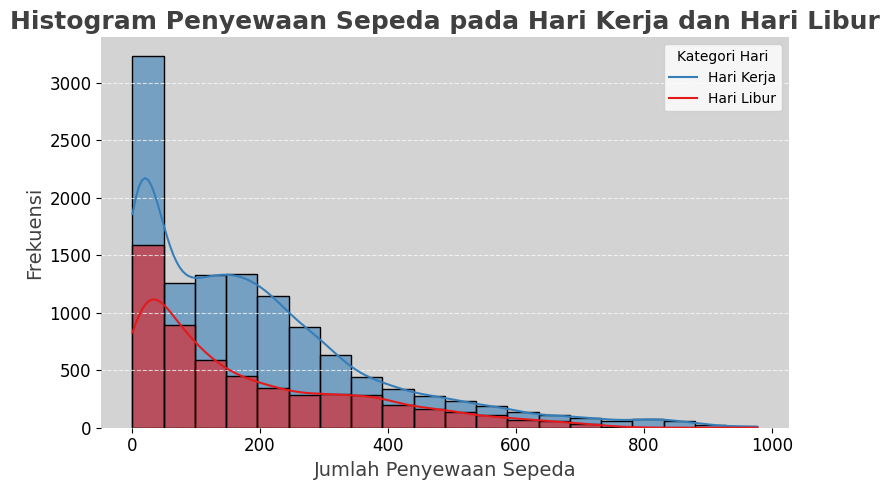

In [259]:
# Distribusi Penyewaan Hari Libur vs Hari Kerja
plt.figure(figsize=(8, 5))
sns.histplot(data=hourly_bike_sharing, x="cnt", hue="workingday", bins=20, kde=True, palette="Set1", alpha=0.6)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Histogram Penyewaan Sepeda pada Hari Kerja dan Hari Libur", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=14, color="#404040")
plt.ylabel("Frekuensi", fontsize=14, color="#404040")
plt.legend(title="Kategori Hari", labels=["Hari Kerja", "Hari Libur"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.
- Distribusi penyewaan pada hari kerja lebih merata dibandingkan hari libur, yang cenderung terkonsentrasi pada jumlah penyewaan yang lebih rendah.
- Ada kemungkinan bahwa pengguna sepeda pada hari kerja lebih banyak berasal dari pekerja atau pelajar yang menggunakan sepeda sebagai moda transportasi.

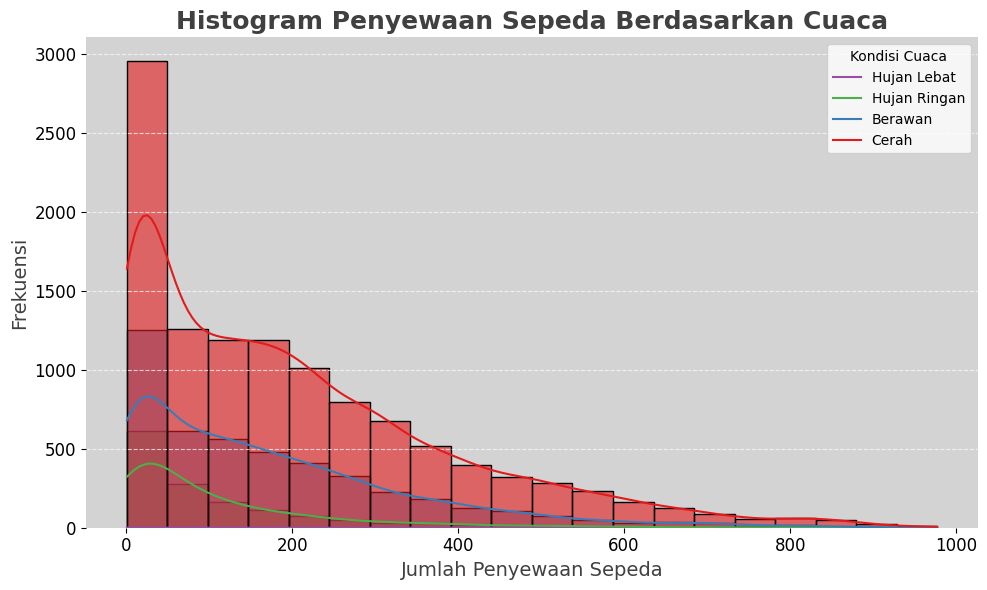

In [260]:
# Distribusi Penyewaan Berdasarkan Cuaca
plt.figure(figsize=(10, 6))
sns.histplot(data=hourly_bike_sharing, x="cnt", hue="weathersit", bins=20, kde=True,
             palette="Set1", alpha=0.6)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Histogram Penyewaan Sepeda Berdasarkan Cuaca", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=14, color="#404040")
plt.ylabel("Frekuensi", fontsize=14, color="#404040")
plt.legend(title="Kondisi Cuaca", labels=["Hujan Lebat", "Hujan Ringan", "Berawan", "Cerah"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Cuaca cerah memiliki jumlah penyewaan tertinggi, yang menunjukkan bahwa kondisi cuaca sangat mempengaruhi keputusan pengguna untuk menyewa sepeda.
- Ketika cuaca hujan (baik ringan maupun lebat), jumlah penyewaan turun drastis, yang masuk akal karena kondisi basah tidak ideal untuk bersepeda.
- Berawan masih memiliki jumlah penyewaan yang cukup tinggi, tetapi tidak sebanyak saat cuaca cerah.

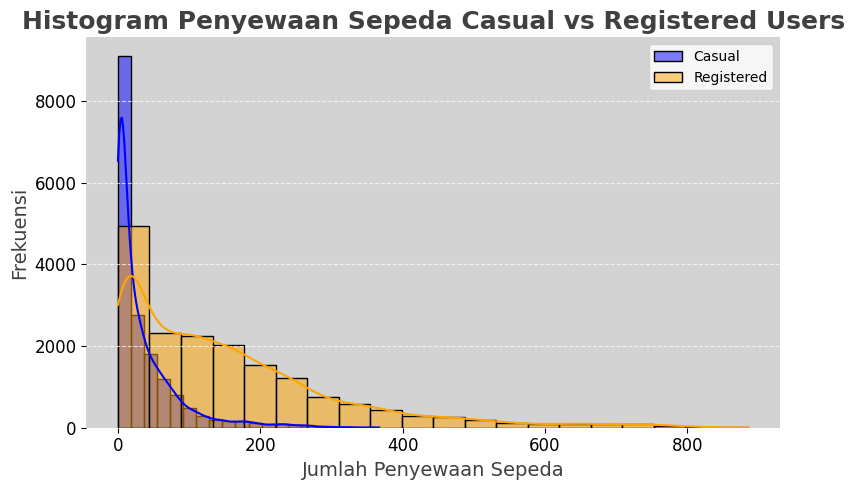

In [261]:
# Distribusi Penyewaan Casual vs Registered Users
plt.figure(figsize=(8, 5))
sns.histplot(hourly_bike_sharing["casual"], kde=True, bins=20, color='blue', label='Casual')
sns.histplot(hourly_bike_sharing["registered"], kde=True, bins=20, color='orange', label='Registered')
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Histogram Penyewaan Sepeda Casual vs Registered Users", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=14, color="#404040")
plt.ylabel("Frekuensi", fontsize=14, color="#404040")
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Pengguna terdaftar lebih dominan dibandingkan pengguna kasual dalam hal jumlah penyewaan.
- Pengguna kasual memiliki distribusi yang lebih terkonsentrasi di jumlah penyewaan yang rendah, sedangkan pengguna terdaftar memiliki distribusi yang lebih merata.
- Ini mengindikasikan bahwa pengguna terdaftar mungkin lebih sering menggunakan sepeda sebagai bagian dari rutinitas mereka, sedangkan pengguna kasual lebih sporadis dalam penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pola Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur?

In [262]:
# Ubah Nilai Kolom "workingday" menjadi Kategori (0: Hari Libur, 1: Hari Kerja)
hourly_bike_sharing["workingday"] = hourly_bike_sharing["workingday"].replace({0: "Hari Libur", 1: "Hari Kerja"})
hourly_bike_sharing

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,Hari Libur,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,Hari Libur,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,Hari Libur,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,Hari Libur,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,Hari Libur,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,Hari Kerja,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,Hari Kerja,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,Hari Kerja,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,Hari Kerja,1,0.26,0.2727,0.56,0.1343,13,48,61


In [263]:
# Menghitung Rata-rata Penyewaan Sepeda Hari Kerja dan Hari Libur
workingday_avg = hourly_bike_sharing.groupby("workingday")["cnt"].mean().round(2).reset_index()
workingday_avg

,workingday,cnt
0,Hari Kerja,193.21
1,Hari Libur,181.41


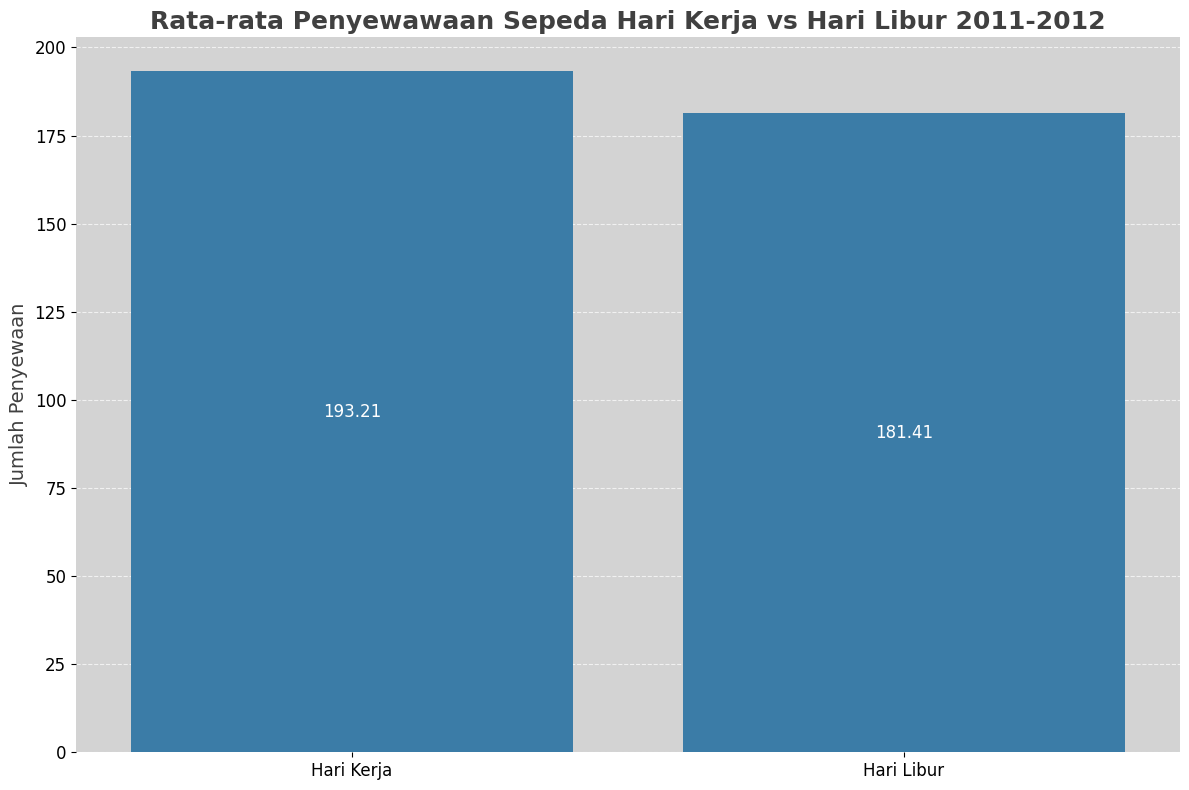

In [264]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=workingday_avg, x="workingday", y="cnt", zorder=3, color="#2980B9")
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Rata-rata Penyewawaan Sepeda Hari Kerja vs Hari Libur 2011-2012", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [265]:
workingday_avg_2011 = hourly_bike_sharing[hourly_bike_sharing["yr"] == 0].groupby("workingday")["cnt"].mean().round(2).reset_index()
workingday_avg_2011

,workingday,cnt
0,Hari Kerja,144.86
1,Hari Libur,141.49


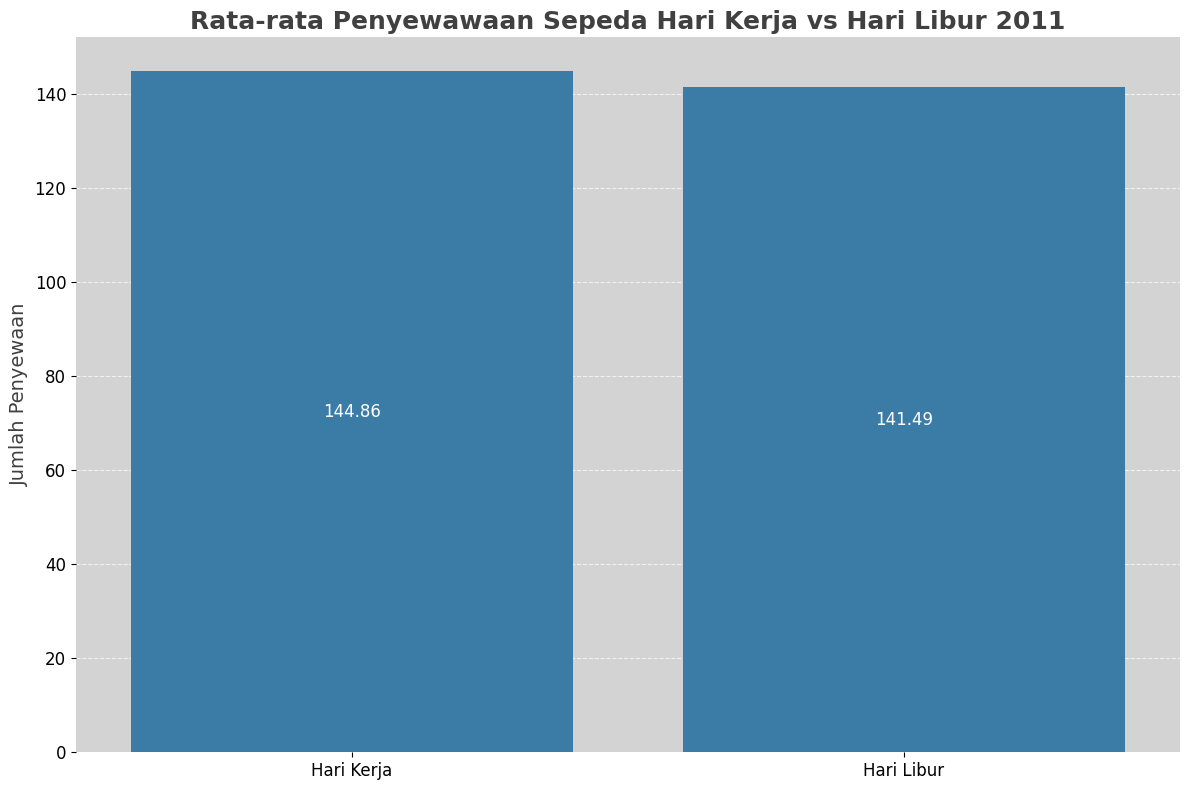

In [266]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=workingday_avg_2011, x="workingday", y="cnt", zorder=3, color="#2980B9")
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Rata-rata Penyewawaan Sepeda Hari Kerja vs Hari Libur 2011", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [276]:
workingday_avg_2012 = hourly_bike_sharing[hourly_bike_sharing["yr"] == 1].groupby("workingday")["cnt"].mean().round(2).reset_index()
workingday_avg_2012

,workingday,cnt
0,Hari Kerja,241.21
1,Hari Libur,220.66


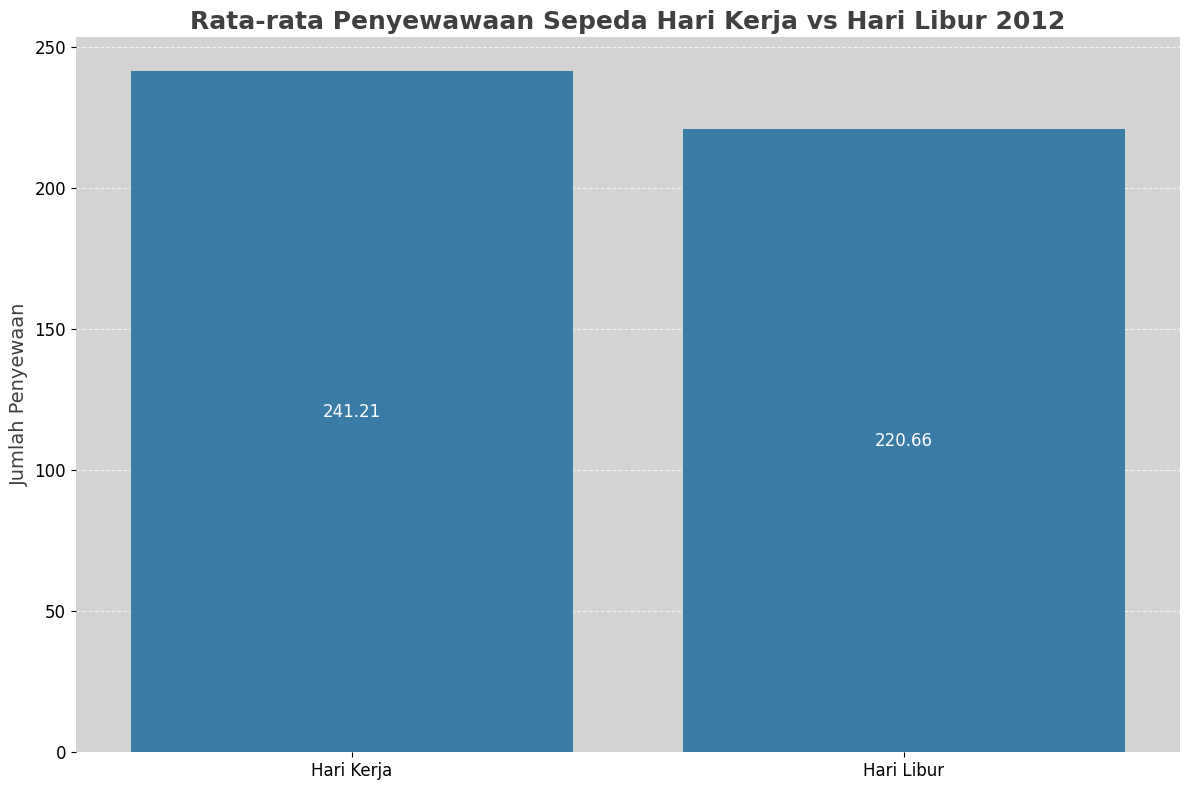

In [277]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=workingday_avg_2012, x="workingday", y="cnt", zorder=3, color="#2980B9")
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Rata-rata Penyewawaan Sepeda Hari Kerja vs Hari Libur 2012", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.
- Meskipun sedikit lebih rendah dari hari kerja, jumlah penyewaan pada hari libur tetap relatif tinggi.
- Selisih jumlah penyewaan antara hari kerja dan hari libur tidak terlalu signifikan.

### Pertanyaan 2: Bagaimana Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda?

In [267]:
# Buat Label Kategori Cuaca
weather_labels = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Lebat"
}

In [268]:
# Ganti Angka dengan Label Kategori
hourly_bike_sharing["weathersit"] = hourly_bike_sharing["weathersit"].replace(weather_labels)
hourly_bike_sharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,Hari Libur,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,Hari Libur,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,Hari Libur,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,Hari Libur,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,Hari Libur,Cerah,0.24,0.2879,0.75,0.0,0,1,1


In [269]:
# Menghitung Rata-rata Penyewaan Sepeda Berdasarkan Cuaca
weather_rental = hourly_bike_sharing.groupby("weathersit")["cnt"].mean().reset_index()
weather_rental

,weathersit,cnt
0,Berawan,175.165493
1,Cerah,204.869272
2,Hujan Lebat,74.333333
3,Hujan Ringan,111.579281


In [270]:
# Ubah Urutan Kategori Agar Tampil Berurutan
order_weather = ["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"]
weather_rental["weathersit"] = pd.Categorical(weather_rental["weathersit"], categories=order_weather, ordered=True)
weather_rental = weather_rental.sort_values("weathersit")

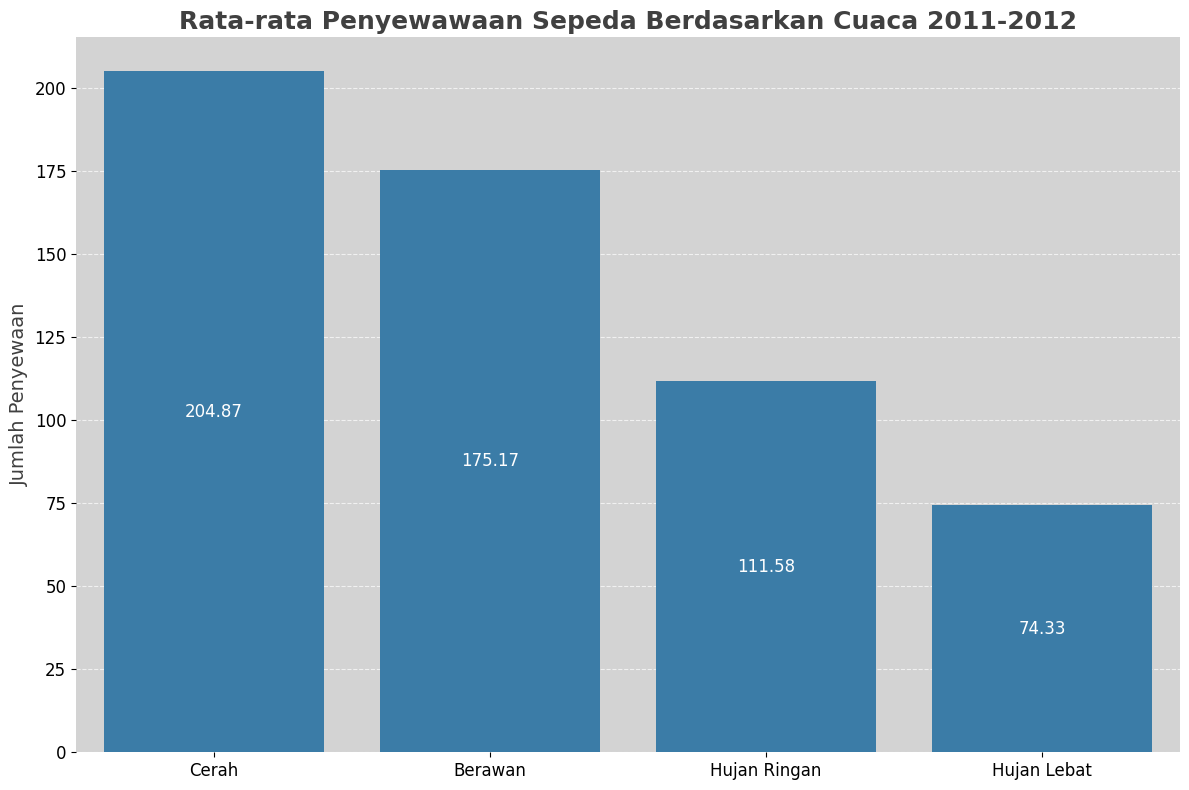

In [278]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=weather_rental, x="weathersit", y="cnt", zorder=3, color="#2980B9")
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Rata-rata Penyewawaan Sepeda Berdasarkan Cuaca 2011-2012", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [279]:
weather_rental_2011 = hourly_bike_sharing[hourly_bike_sharing["yr"] == 0].groupby("weathersit")["cnt"].mean().reset_index()
weather_rental_2011

,weathersit,cnt
0,Berawan,135.490983
1,Cerah,155.013818
2,Hujan Lebat,36.000000
3,Hujan Ringan,86.421255


In [282]:
weather_rental_2011["weathersit"] = pd.Categorical(weather_rental_2011["weathersit"], categories=order_weather, ordered=True)
weather_rental_2011 = weather_rental_2011.sort_values("weathersit")

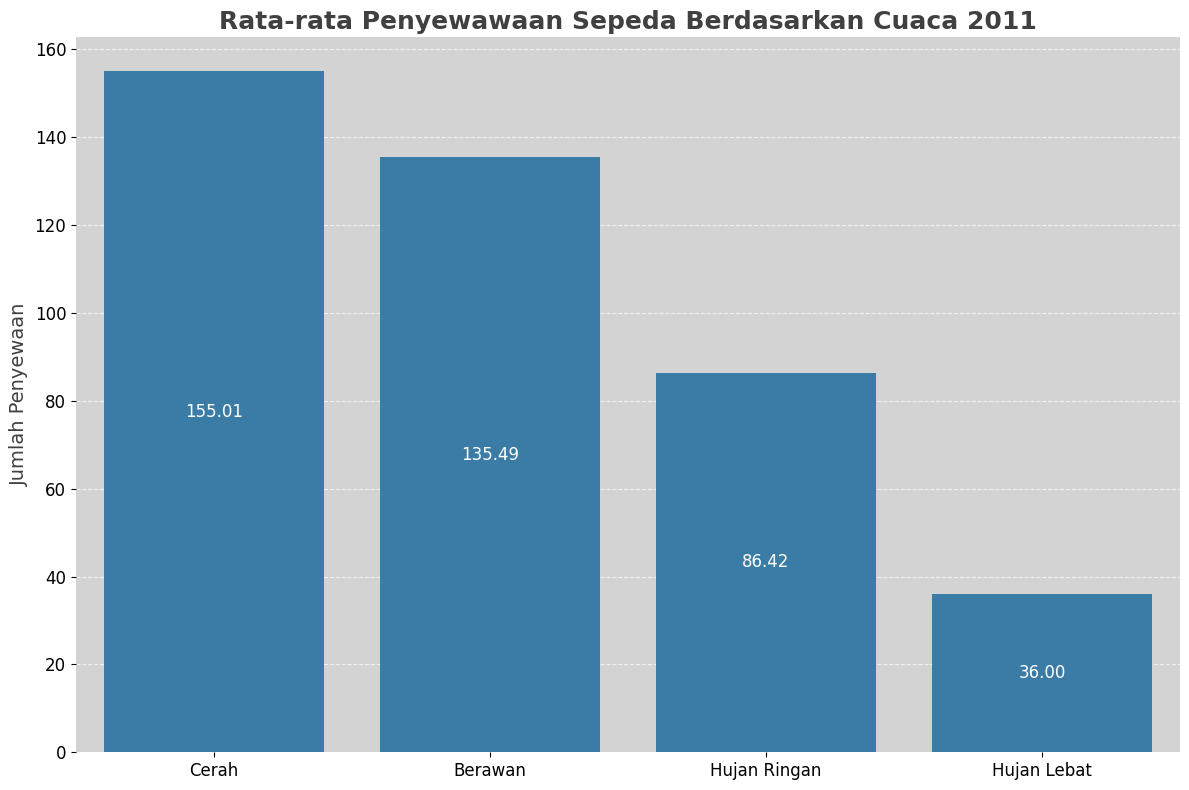

In [283]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=weather_rental_2011, x="weathersit", y="cnt", zorder=3, color="#2980B9")
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Rata-rata Penyewawaan Sepeda Berdasarkan Cuaca 2011", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [281]:
weather_rental_2012 = hourly_bike_sharing[hourly_bike_sharing["yr"] == 1].groupby("weathersit")["cnt"].mean().reset_index()
weather_rental_2012

,weathersit,cnt
0,Berawan,212.997850
1,Cerah,253.661581
2,Hujan Lebat,93.500000
3,Hujan Ringan,142.376176


In [284]:
weather_rental_2012["weathersit"] = pd.Categorical(weather_rental_2012["weathersit"], categories=order_weather, ordered=True)
weather_rental_2012 = weather_rental_2012.sort_values("weathersit")

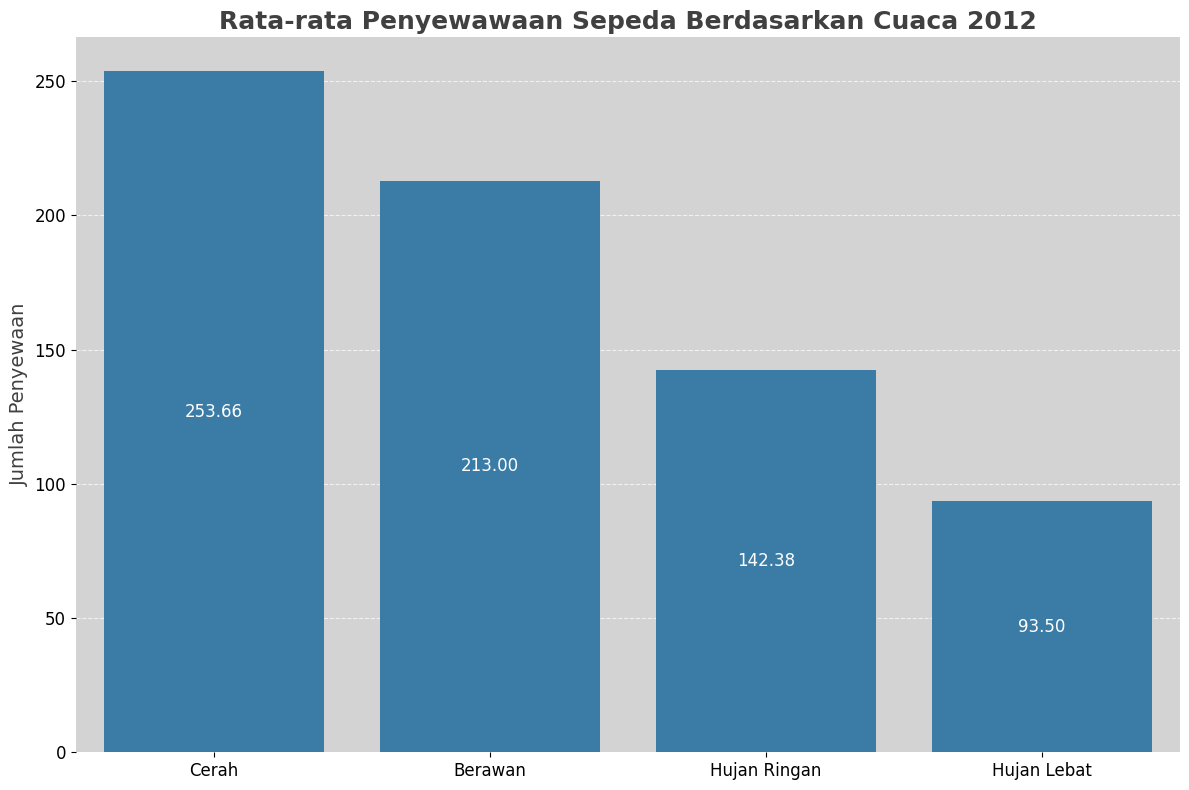

In [285]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=weather_rental_2012, x="weathersit", y="cnt", zorder=3, color="#2980B9")
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Rata-rata Penyewawaan Sepeda Berdasarkan Cuaca 2012", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda paling tinggi terjadi saat cuaca cerah.
- Cuaca berawan juga memiliki jumlah penyewaan yang relatif tinggi, meskipun lebih rendah dibandingkan saat cerah.
- Penyewaan turun drastis saat hujan ringan dan lebih rendah lagi saat hujan lebat.

## Analisis Lanjutan (Opsional)

### Time Clustering

In [272]:
# Membuat Kolom "time_cluster" berdasarkan Jam
def rentang_waktu(hr):
    if 6 <= hr < 12:
        return "Pagi"
    elif 12 <= hr < 15:
        return "Siang"
    elif 15 <= hr < 20:
        return "Sore"
    else:
        return "Malam"

hourly_bike_sharing["time_cluster"] = hourly_bike_sharing["hr"].apply(rentang_waktu)

In [273]:
# Hitung Jumlah Penyewaan berdasarkan Rentang Waktu
time_group = hourly_bike_sharing.groupby(["time_cluster"])[["casual", "registered"]].sum().reset_index()
time_group

,time_cluster,casual,registered
0,Malam,93488,462569
1,Pagi,126348,780971
2,Siang,157520,387465
3,Sore,242661,1041657


In [274]:
# Ubah Urutan Kategori Agar Tampil Berurutan
order_time = ["Pagi", "Siang", "Sore", "Malam"]
time_group["time_cluster"] = pd.Categorical(time_group["time_cluster"], categories=order_time, ordered=True)
time_group = time_group.sort_values("time_cluster")

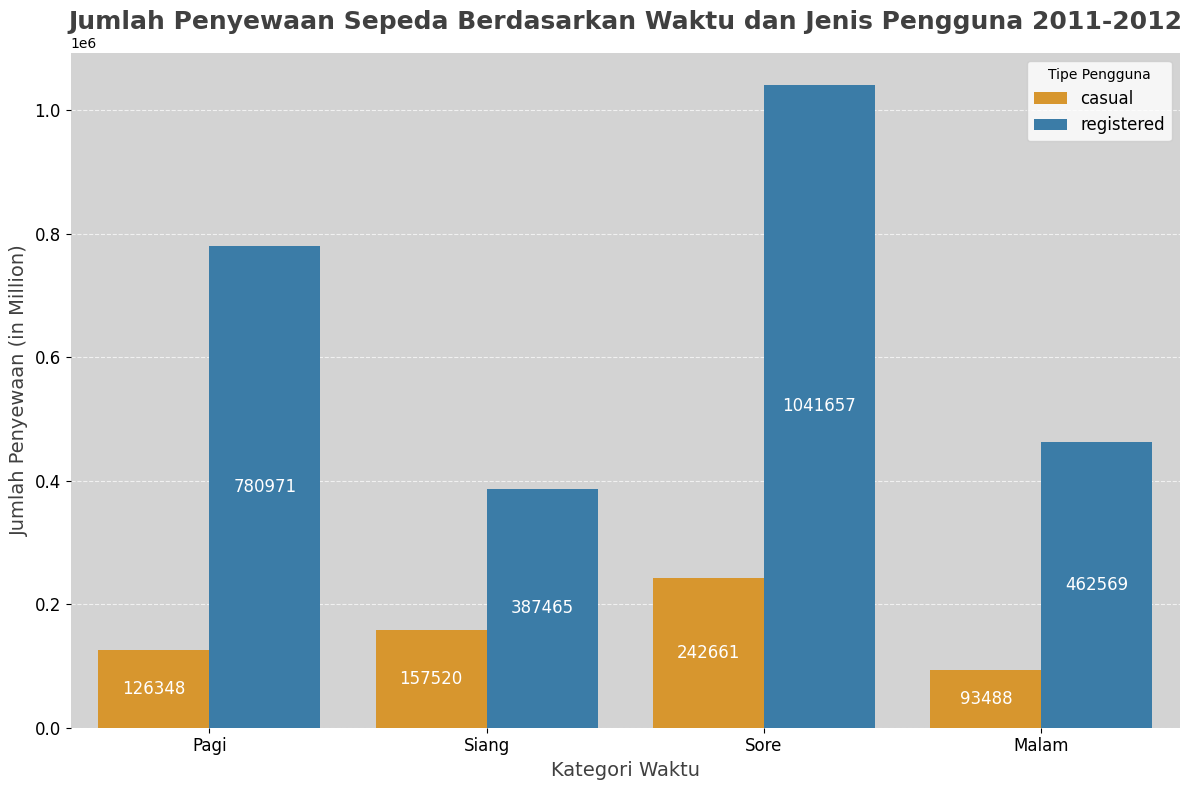

In [288]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=time_group.melt(id_vars="time_cluster", var_name="User Type", value_name="Jumlah"),
                 x="time_cluster", y="Jumlah", hue="User Type", zorder=3,
                 palette={"casual": "#F39C12", "registered": "#2980B9"})
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Waktu dan Jenis Pengguna 2011-2012", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("Kategori Waktu", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan (in Million)", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.legend(title="Tipe Pengguna", fontsize=12)
plt.tight_layout()
plt.show()

In [286]:
# Hitung Jumlah Penyewaan berdasarkan Rentang Waktu
time_group_2011 = hourly_bike_sharing[hourly_bike_sharing["yr"] == 0].groupby(["time_cluster"])[["casual", "registered"]].sum().reset_index()
time_group_2011

,time_cluster,casual,registered
0,Malam,40706,175954
1,Pagi,50625,286168
2,Siang,60255,144764
3,Sore,95666,388965


In [287]:
time_group_2011["time_cluster"] = pd.Categorical(time_group_2011["time_cluster"], categories=order_time, ordered=True)
time_group_2011 = time_group_2011.sort_values("time_cluster")

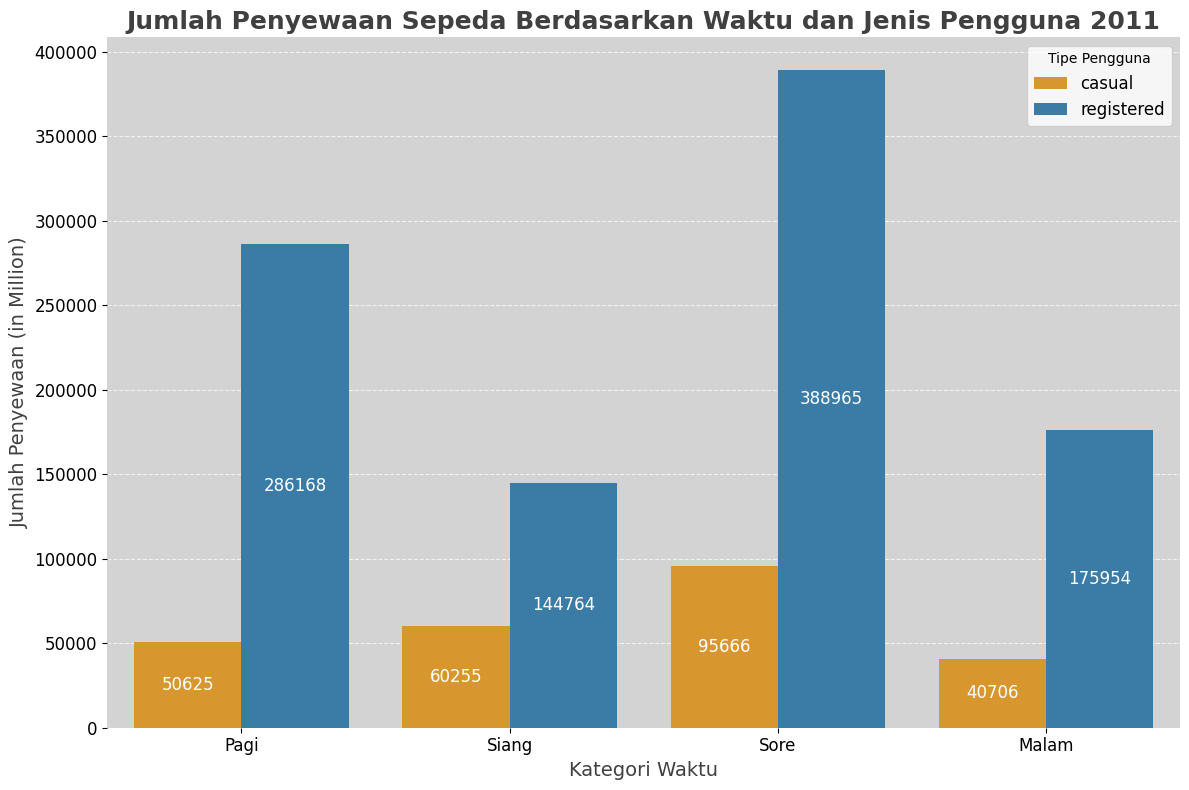

In [289]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=time_group_2011.melt(id_vars="time_cluster", var_name="User Type", value_name="Jumlah"),
                 x="time_cluster", y="Jumlah", hue="User Type", zorder=3,
                 palette={"casual": "#F39C12", "registered": "#2980B9"})
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Waktu dan Jenis Pengguna 2011", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("Kategori Waktu", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan (in Million)", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.legend(title="Tipe Pengguna", fontsize=12)
plt.tight_layout()
plt.show()

In [290]:
# Hitung Jumlah Penyewaan berdasarkan Rentang Waktu
time_group_2012 = hourly_bike_sharing[hourly_bike_sharing["yr"] == 1].groupby(["time_cluster"])[["casual", "registered"]].sum().reset_index()
time_group_2012

,time_cluster,casual,registered
0,Malam,52782,286615
1,Pagi,75723,494803
2,Siang,97265,242701
3,Sore,146995,652692


In [291]:
time_group_2012["time_cluster"] = pd.Categorical(time_group_2012["time_cluster"], categories=order_time, ordered=True)
time_group_2012 = time_group_2012.sort_values("time_cluster")

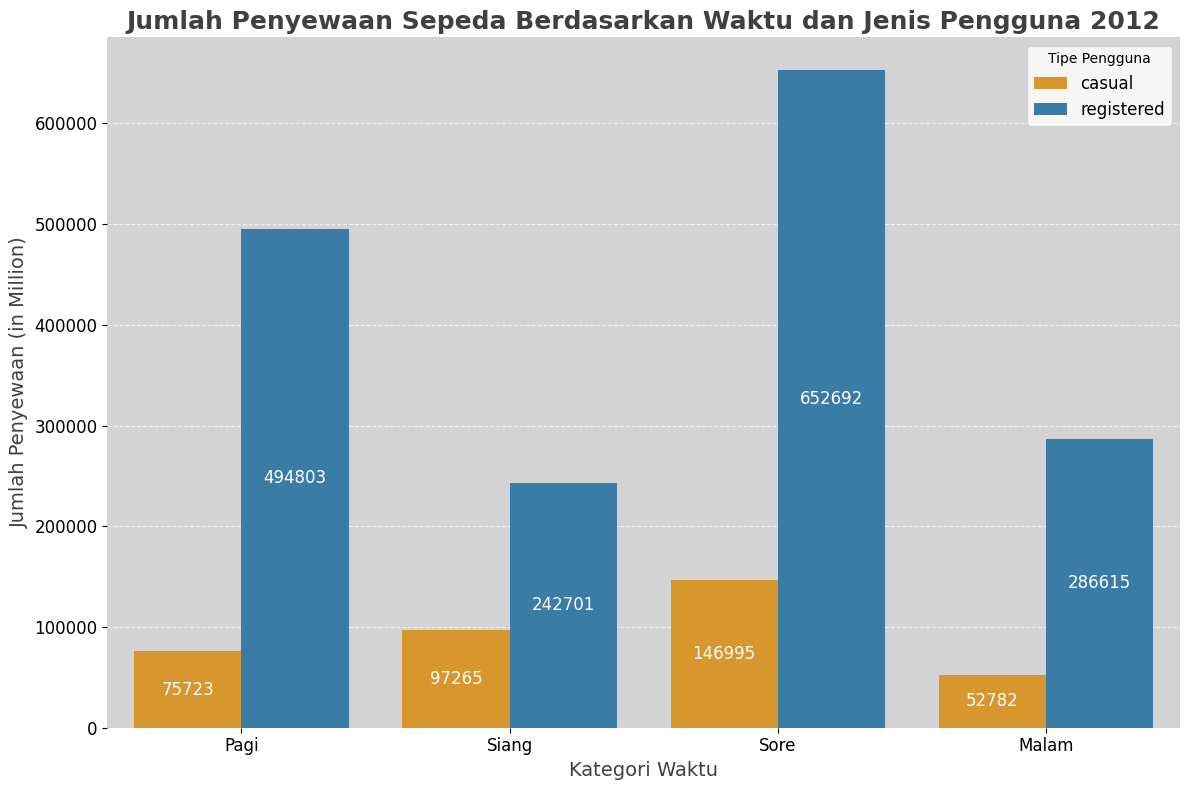

In [292]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=time_group_2012.melt(id_vars="time_cluster", var_name="User Type", value_name="Jumlah"),
                 x="time_cluster", y="Jumlah", hue="User Type", zorder=3,
                 palette={"casual": "#F39C12", "registered": "#2980B9"})
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="center", color="white", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Waktu dan Jenis Pengguna 2012", fontsize=18, fontweight="bold", color="#404040")
plt.xlabel("Kategori Waktu", fontsize=14, color="#404040")
plt.ylabel("Jumlah Penyewaan (in Million)", fontsize=14, color="#404040")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", color="white", linestyle="--", alpha=0.7)
plt.legend(title="Tipe Pengguna", fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Pengguna registered memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan pengguna casual di semua rentang waktu.
- Sore hari memiliki jumlah penyewaan tertinggi, terutama oleh pengguna registered.
- Siang hari memiliki jumlah penyewaan paling sedikit untuk tipe pengguna registered.
- Malam hari memiliki jumlah penyewaan paling sedikit untuk tipe pengguna casual

## Conclusion

- Berdasarkan visualisasi data penyewaan sepeda pada tahun 2011-2012, terdapat pola yang menunjukkan bahwa rata-rata penyewaan sepeda lebih tinggi pada hari kerja (193,21) dibandingkan dengan hari libur (181,41). Perbedaan ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai moda transportasi untuk aktivitas harian seperti bekerja atau sekolah dibandingkan dengan rekreasi pada hari libur. Meskipun penyewaan pada hari libur tetap tinggi, sedikitnya perbedaan antara kedua kategori ini menunjukkan bahwa penggunaan sepeda cukup konsisten sepanjang minggu, baik untuk keperluan mobilitas maupun rekreasi.

- Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda, di mana penyewaan tertinggi terjadi saat cuaca cerah dan menurun seiring memburuknya kondisi cuaca. Saat berawan, jumlah penyewaan masih cukup tinggi, tetapi ketika hujan turun, terutama hujan lebat, terjadi penurunan drastis dalam jumlah penyewa. Dibandingkan tahun 2011, jumlah penyewaan di semua kondisi cuaca meningkat pada tahun 2012, yang dapat mengindikasikan faktor lain seperti peningkatan layanan atau tren penggunaan sepeda. Secara keseluruhan, cuaca cerah menjadi kondisi paling ideal untuk penyewaan sepeda, sementara hujan lebat menjadi penghambat utama.

- Pola penyewaan sepeda menunjukkan bahwa sore hari adalah waktu dengan jumlah penyewaan tertinggi, terutama oleh pengguna terdaftar (registered), yang kemungkinan besar menggunakan sepeda sebagai bagian dari rutinitas harian mereka. Pengguna kasual (casual) lebih aktif menyewa sepeda pada siang dan sore hari, yang mengindikasikan bahwa mereka cenderung menggunakannya untuk keperluan rekreasi. Pagi hari juga memiliki jumlah penyewaan yang tinggi, terutama oleh pengguna registered, sedangkan malam hari memiliki jumlah penyewaan terendah. Selain itu, terdapat tren peningkatan jumlah penyewaan dari tahun ke tahun, terutama pada pengguna registered, yang menunjukkan pertumbuhan minat terhadap penggunaan sepeda sebagai moda transportasi dan aktivitas rekreasi.